In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ml_work/time series/airline-passenger-traffic.csv')
data.columns = ['month','passengers']

In [3]:
data['month'] = pd.to_datetime(data['month'],format = '%Y-%m')
data = data.set_index('month')

In [4]:
data.head()

,passengers
month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


In [5]:
### Time series analysis


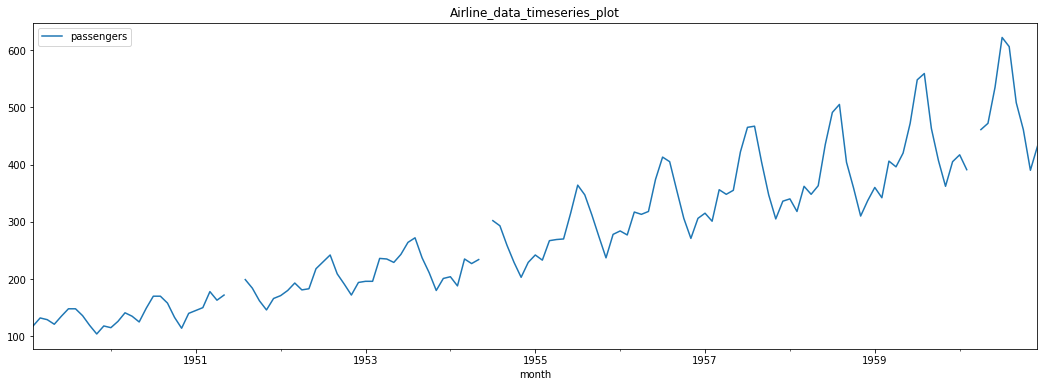

In [6]:
data.plot(figsize=(18,6))
plt.legend(loc='best')
plt.title('Airline_data_timeseries_plot')
plt.show(block=False)

Missing value treatment
Mean-imputation


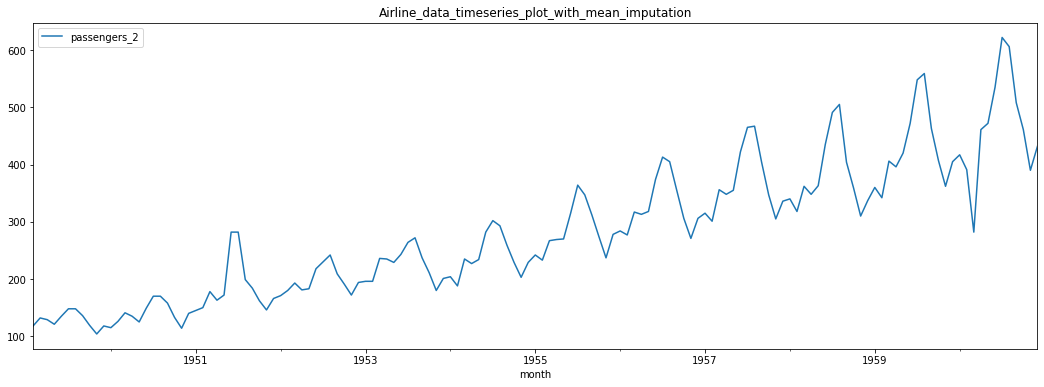

In [7]:
data = data.assign(passengers_2 = data.passengers.fillna(data.passengers.mean()))
data[('passengers_2')].plot(figsize=(18,6))
plt.legend(loc='best')
plt.title('Airline_data_timeseries_plot_with_mean_imputation')
plt.show(block=False)

In [8]:
## linear inpolation 

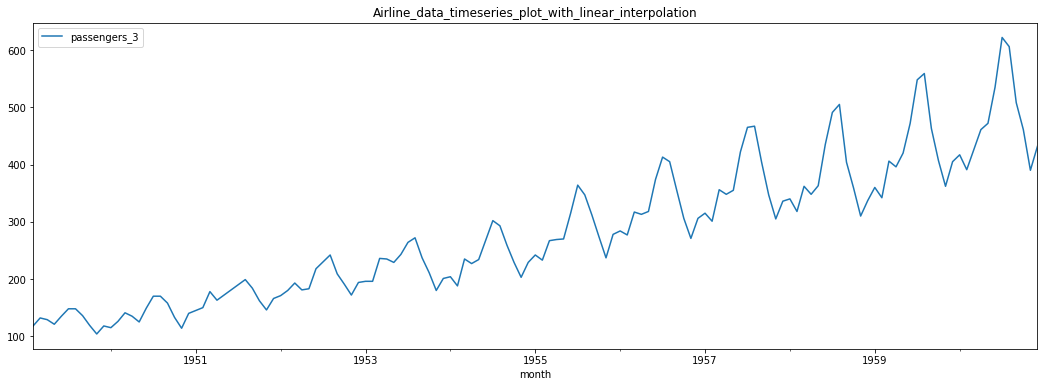

In [9]:
data = data.assign(passengers_3 = data.passengers.interpolate(method='linear'))
data[('passengers_3')].plot(figsize=(18,6))
plt.legend(loc='best')
plt.title('Airline_data_timeseries_plot_with_linear_interpolation')
plt.show(block=False)

In [10]:
data['passengers'] = data['passengers_3']

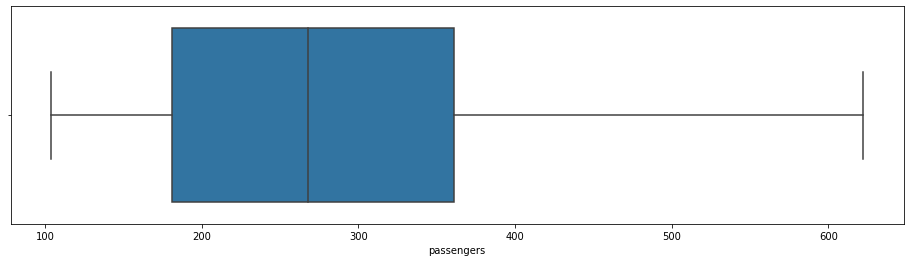

In [11]:
import seaborn as sns
fig = plt.subplots(figsize = (16,4))
ax = sns.boxplot(x = data['passengers'],whis=1.5)

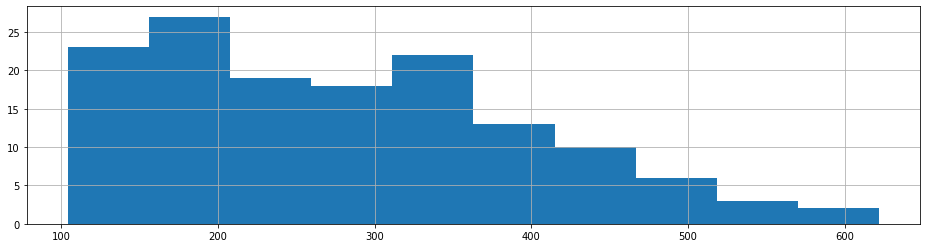

In [12]:
# histogram
fig = data.passengers.hist(figsize=(16,4))

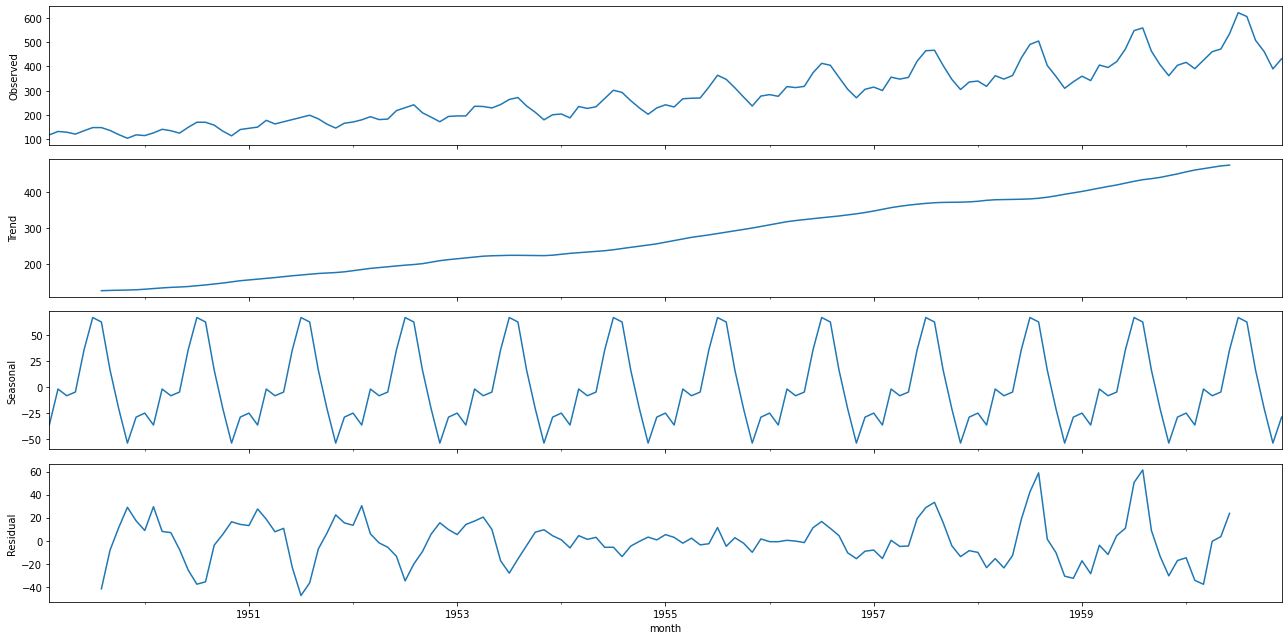

In [13]:
### Time Series Decomposition
#additive seasonal decomposition
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18,9
decomposition = sm.tsa.seasonal_decompose(data.passengers,model='additive')
fig = decomposition.plot()
plt.show()


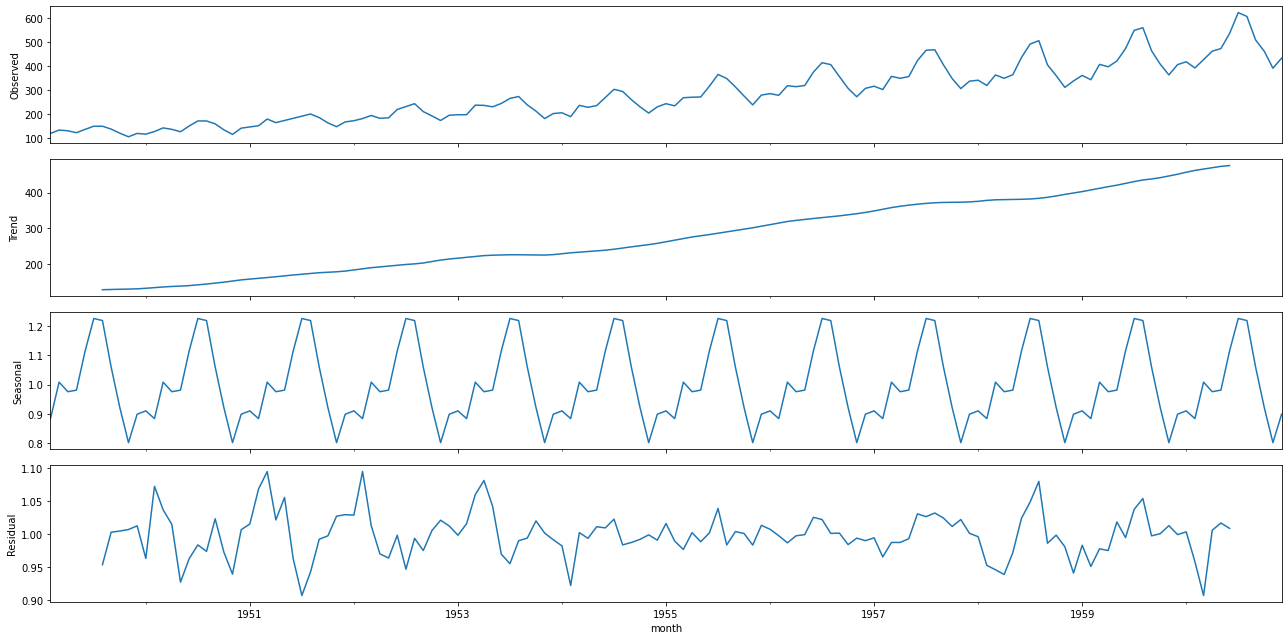

In [14]:
rcParams['figure.figsize'] = 18,9
decomposition = sm.tsa.seasonal_decompose(data.passengers,model='multiplicative')
fig = decomposition.plot()
plt.show()

# Training models


In [62]:
train_len = 120 
train_data = data[0:train_len]
test = data[train_len:]

***Naive Method***

In [66]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train_data['passengers'][train_len-1]


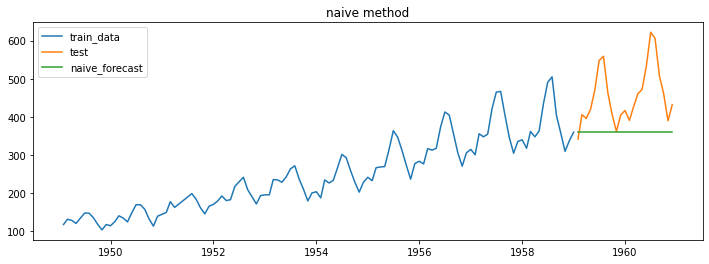

In [67]:
plt.figure(figsize = (12,4))
plt.plot(train_data['passengers'],label ='train_data' )
plt.plot(test['passengers'],label ='test' )
plt.plot(y_hat_naive['naive_forecast'],label ='naive_forecast' )
plt.legend(loc='best')
plt.title('naive method')
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_naive['naive_forecast'])/test['passengers'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.4,19.68


In [69]:

print(rmse)
print(mape)

121.4
19.68


***Avg Forcast***

In [72]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train_data['passengers'].mean()

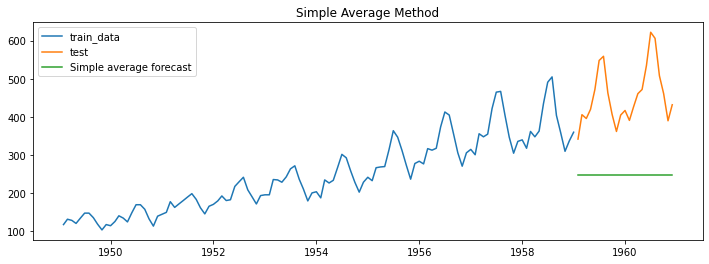

In [73]:
plt.figure(figsize=(12,4))
plt.plot(train_data['passengers'], label='train_data')
plt.plot(test['passengers'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [74]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_avg['avg_forecast'])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.4,19.68
0,Simple average method,221.2,44.36


***Simple Moving Average Method***

In [108]:
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

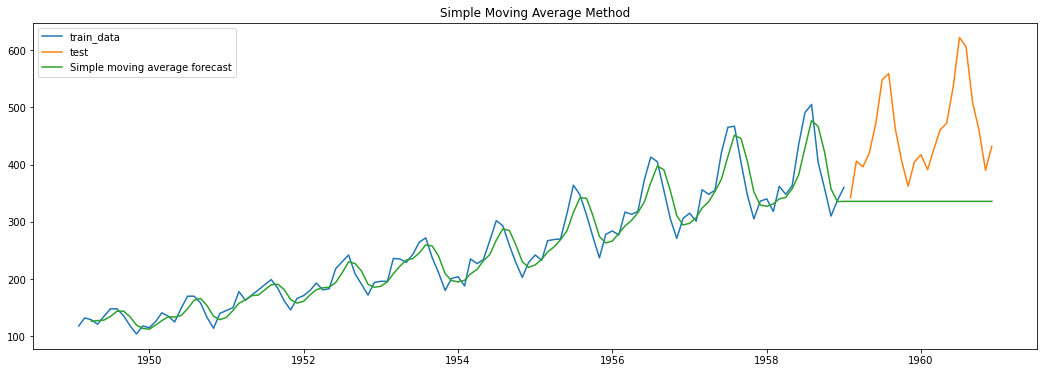

In [109]:
plt.figure(figsize=(18,6))
plt.plot(train_data['passengers'], label='train_data')
plt.plot(test['passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [79]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_sma['sma_forecast'][train_len:])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,104.28,15.67


***Simple Exponential Smoothing Method***

In [81]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train_data['passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


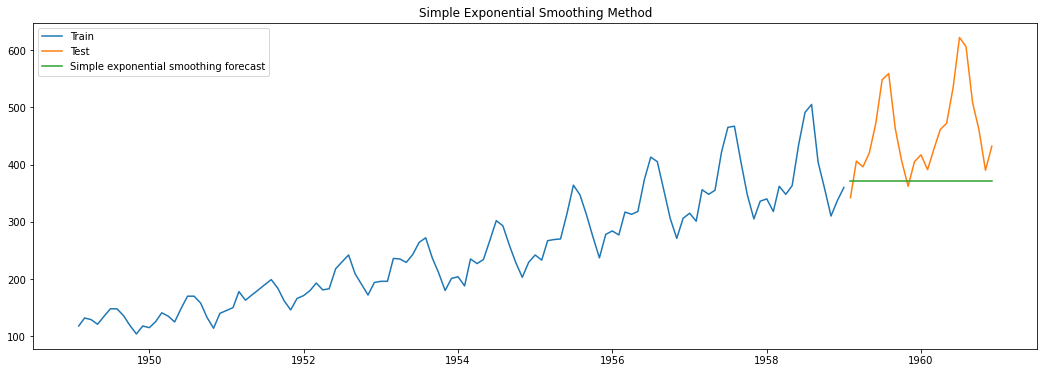

In [82]:
plt.figure(figsize=(18,6))
plt.plot(train_data['passengers'], label='Train')
plt.plot(test['passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [83]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_ses['ses_forecast'])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,104.28,15.67
0,Simple exponential smoothing forecast,112.15,17.55


***Holt\'s exponential smoothing method***

In [84]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_data['passengers']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 118.0, 'initial_slope': 14.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


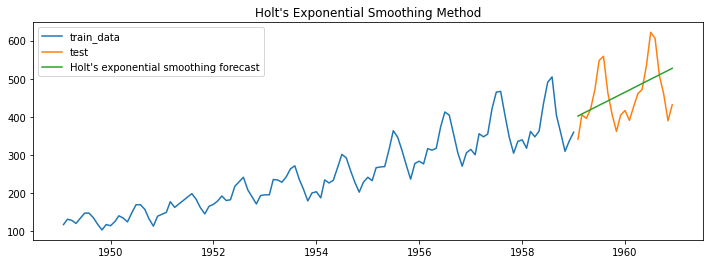

In [86]:
plt.figure(figsize=(12,4))
plt.plot( train_data['passengers'], label='train_data')
plt.plot(test['passengers'], label='test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [88]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_holt['holt_forecast'])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,104.28,15.67
0,Simple exponential smoothing forecast,112.15,17.55
0,Holt's exponential smoothing method,71.27,12.75


***Holt Winters\' Additive Method***

In [90]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train_data['passengers']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(23)

{'smoothing_level': 0.2631578925350555, 'smoothing_slope': 0.050534814398665674, 'smoothing_seasonal': 0.7368421030613712, 'damping_slope': nan, 'initial_level': 206.84464215928838, 'initial_slope': 2.0943208438897747, 'initial_seasons': array([ -90.22523269,  -76.406035  ,  -79.66930346,  -87.75805964,
        -73.74482738,  -60.81774253,  -61.01332787,  -73.21637721,
        -90.37116428, -105.25649431,  -90.91910777,  -93.85787412]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


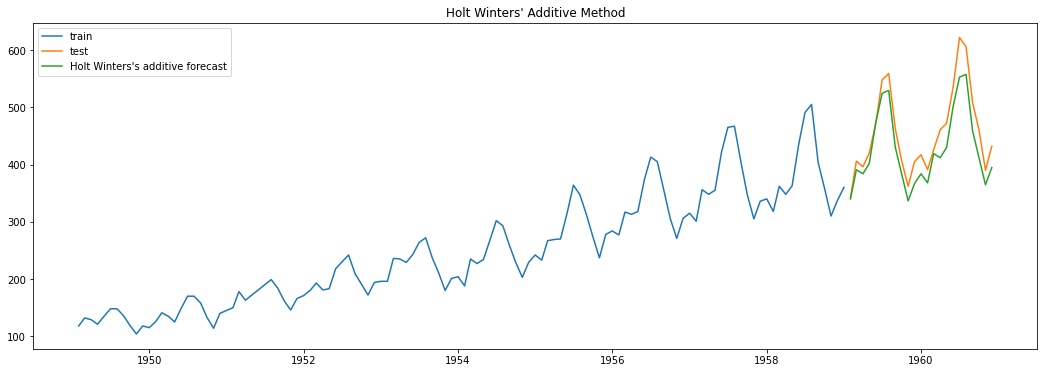

In [91]:
plt.figure(figsize=(18,6))
plt.plot( train_data['passengers'], label='train')
plt.plot(test['passengers'], label='test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [93]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_hwa['hw_forecast'])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,104.28,15.67
0,Simple exponential smoothing forecast,112.15,17.55
0,Holt's exponential smoothing method,71.27,12.75
0,Holt Winters' additive method,34.13,6.37


***Holt Winters\' Mulitplicative Method***

In [95]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train_data['passengers']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(23)

{'smoothing_level': 0.3157894736526667, 'smoothing_slope': 0.05263126447168534, 'smoothing_seasonal': 0.6842105262842456, 'damping_slope': nan, 'initial_level': 208.69981154945813, 'initial_slope': 1.271244348561395, 'initial_seasons': array([0.58965376, 0.64430462, 0.61485636, 0.56784817, 0.63010543,
       0.69306308, 0.69284049, 0.63396818, 0.55133878, 0.48738474,
       0.56998034, 0.56536063]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


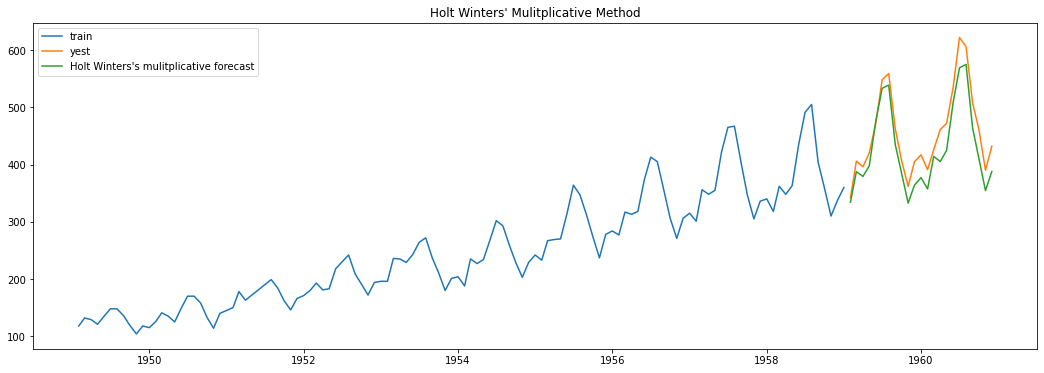

In [97]:
plt.figure(figsize=(18,6))
plt.plot( train_data['passengers'], label='train')
plt.plot(test['passengers'], label='yest')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [99]:
rmse = np.sqrt(mean_squared_error(test['passengers'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passengers']-y_hat_hwm['hw_forecast'])/test['passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,121.40,19.68
0,Simple average method,221.20,44.36
0,Simple moving average forecast,104.28,15.67
0,Simple exponential smoothing forecast,112.15,17.55
0,Holt's exponential smoothing method,71.27,12.75
0,Holt Winters' additive method,34.13,6.37
0,Holt Winters' multiplicative method,33.63,6.69
